In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})

data = load_iris()

L'attributo data.data contiene una matrice $150 \times 4$ dove 150 sono i campioni, mentre 4 sono le feature. Per comodità aggiungiamo alla matrice una colonna contenente le classi. La classe è un intero che va da 0 a 3 e indica uno specifico tipo di fiore. 

In [52]:
features = np.array(data.data)
target = np.array(data.target)
fulldata = np.insert(features, 4, target, axis=1)

In [53]:
FEATURE_NAMES = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
TARGET_NAME = ['target']

df = pd.DataFrame(fulldata, columns=(FEATURE_NAMES + TARGET_NAME))
df = df.astype({'target': 'category'})
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Separiamo target e features in due dataframe diversi. 

In [54]:
X = df.loc[:, FEATURE_NAMES]
y = df.loc[:, TARGET_NAME]

La PCA è influenzata dalla differenza di scala nei dati, per cui conviene normalizzare le feature. Utilizziamo lo StandardScaler di Scikit-Learn. 

In [55]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_norm = ss.fit_transform(X)
mean, var = ss.mean_, ss.var_

Passiamo da 4 feature a 2 feature e visualizziamo la disposizione dei dati nello spazio. 

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pcomps = pca.fit_transform(X_norm)

Alla matrice delle feature è stata applicata una rotazione rigida che dispone i dati sugli assi in cui la variabilità è maggiore, ovvero le prime (due) componenti principali. 

In [57]:
reduced_df = pd.DataFrame(data=pcomps, columns = ['pc1', 'pc2'])
reduced_df.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


Aggiungiamo la classe (target) ai dati in modo da fare un plot che distingua i punti nel piano in base alla loro classe con un colore differente. 

In [65]:
target = df['target'].map({ 0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica' })

final_df = pd.concat([ reduced_df, target ], axis=1)
final_df.head()

,pc1,pc2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

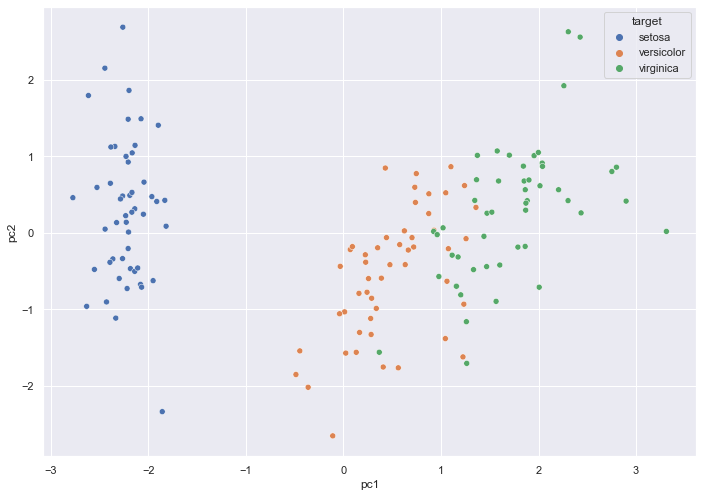

In [67]:
sns.scatterplot(data=final_df, x='pc1', y='pc2', hue='target')